In [772]:
%pip install xgboost

In [773]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


## 處理訓練集

In [774]:
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [775]:
df = df.set_index('PassengerId')
df_test = df_test.set_index('PassengerId')

In [776]:
def null_chk(d):  
    na_col = d.isnull().sum()[d.isnull().sum()/len(d)>0]
    print('【缺失值清單】\n',na_col,'\n','-'*70,'\n【唯一值清單】')
    
    for c in d.columns:
        print(f'{c} --> ',list(d[c].unique()))
        
# 缺失值填充策略：float64 - 中位數；object - 眾數
# 不回傳新df，直接取代原series
def fn_fillna(d):
    dcol = list(d.isna().sum()[d.isna().sum()/len(d)>0].keys())
    print(dcol)
    for c in dcol:
        if d[c].dtype != 'object':
            d[c] = d[c].fillna(d[c].median())
        else:
            d[c] = d[c].fillna(d[c].mode()[0])
            
# 向前填充
def fn_fillna2(d):
    dcol = list(d.isna().sum()[d.isna().sum()/len(d)>0].keys())
    print(dcol)
    for c in dcol:
        if d[c].dtype != 'object':
            d[c] = d[c].fillna(d[c].median())
        else:
            d[c] = d[c].fillna(method='backfill')        

PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* Cabin - The cabin number where the passenger is staying. Takes the form `deck/num/side`, where side can be either P for Port or S for Starboard.
* Destination - The planet the passenger will be debarking to.
* Age - The age of the passenger.
* VIP - Whether the passenger has paid for special VIP service during the voyage.
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [777]:
# 拆分col中str
SPLIT_INTO_COL = ['Cabin_deck','Cabin_num','Cabin_side']
df[SPLIT_INTO_COL] = df['Cabin'].str.split('/', expand=True)
df_test[SPLIT_INTO_COL] = df_test['Cabin'].str.split('/', expand=True)

# 倉別轉型態float
df['Cabin_num'] = df['Cabin_num'].astype('float64')
df_test['Cabin_num'] = df_test['Cabin_num'].astype('float64')

# drop col
DROP_COL = ['Cabin','Name']
df.drop(columns=DROP_COL,inplace=True)
df_test.drop(columns=DROP_COL,inplace=True)
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,Cabin_num,Cabin_side
PassengerId,,,,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0.0,P
0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0.0,S
0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0.0,S
0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0.0,S
0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,98.0,P
9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499.0,S
9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500.0,S


In [778]:
list(df['Destination'].unique())

['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan]

In [779]:
# 查看不同目的地對標籤的影響
for u in list(df['Destination'].unique()):
    print(u,'-->  ',df[df['Destination']==u]['Transported'].value_counts())

TRAPPIST-1e -->   Transported
False    3128
True     2787
Name: count, dtype: int64
PSO J318.5-22 -->   Transported
True     401
False    395
Name: count, dtype: int64
55 Cancri e -->   Transported
True     1098
False     702
Name: count, dtype: int64
nan -->   Series([], Name: count, dtype: int64)


In [780]:
df_test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_deck,Cabin_num,Cabin_side
PassengerId,,,,,,,,,,,,,
0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,3.0,S
0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,4.0,S
0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,0.0,S
0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,1.0,S
0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,5.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,G,1496.0,S
9269_01,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,NaN,NaN,NaN
9271_01,Mars,True,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,D,296.0,P


In [781]:
fn_fillna(df)

['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_deck', 'Cabin_num', 'Cabin_side']


C:\Users\JauJyeCH\AppData\Local\Temp\ipykernel_15700\7662276.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d[c] = d[c].fillna(d[c].mode()[0])


In [782]:
null_chk(df)

【缺失值清單】
 Series([], dtype: int64) 
 ---------------------------------------------------------------------- 
【唯一值清單】
HomePlanet -->  ['Europa', 'Earth', 'Mars']
CryoSleep -->  [False, True]
Destination -->  ['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e']
Age -->  [39.0, 24.0, 58.0, 33.0, 16.0, 44.0, 26.0, 28.0, 35.0, 14.0, 34.0, 45.0, 32.0, 48.0, 31.0, 27.0, 0.0, 1.0, 49.0, 29.0, 10.0, 7.0, 21.0, 62.0, 15.0, 43.0, 47.0, 2.0, 20.0, 23.0, 30.0, 17.0, 55.0, 4.0, 19.0, 56.0, 25.0, 38.0, 36.0, 22.0, 18.0, 42.0, 37.0, 13.0, 8.0, 40.0, 3.0, 54.0, 9.0, 6.0, 64.0, 67.0, 61.0, 50.0, 41.0, 57.0, 11.0, 52.0, 51.0, 46.0, 60.0, 63.0, 59.0, 5.0, 79.0, 68.0, 74.0, 12.0, 53.0, 65.0, 71.0, 75.0, 70.0, 76.0, 78.0, 73.0, 66.0, 69.0, 72.0, 77.0]
VIP -->  [False, True]
RoomService -->  [0.0, 109.0, 43.0, 303.0, 42.0, 39.0, 73.0, 719.0, 8.0, 32.0, 1286.0, 412.0, 980.0, 22.0, 1125.0, 214.0, 784.0, 554.0, 970.0, 790.0, 4.0, 279.0, 45.0, 1.0, 1946.0, 793.0, 887.0, 190.0, 16.0, 46.0, 147.0, 14.0, 7406.0, 688.0, 2

In [783]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   bool   
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
 11  Cabin_deck    8693 non-null   object 
 12  Cabin_num     8693 non-null   float64
 13  Cabin_side    8693 non-null   object 
dtypes: bool(3), float64(7), object(4)
memory usage: 1.1+ MB


In [784]:
df.index.name

'PassengerId'

## 將object col轉ohe

In [785]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

OHE_COL = ['Destination','Cabin_deck','Cabin_side','HomePlanet']

# 全域參數 OHE_COL：加入應編碼col list
# train/test 必需經此處理
def ohe_coding(d):
    x_encoded = ohe.fit_transform(d[OHE_COL])
    x_encoded = pd.DataFrame(x_encoded.toarray(), columns=ohe.get_feature_names_out(OHE_COL))
    x_encoded = pd.concat([pd.DataFrame({d.index.name:list(d.index)}),x_encoded],axis=1).set_index(d.index.name)

    d2 = pd.concat([d, x_encoded], axis=1)
    d2.drop(OHE_COL, axis=1, inplace=True)
    
    return d2

In [786]:
df2 = ohe_coding(df)

In [787]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   bool   
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   bool   
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   Transported                8693 non-null   bool   
 9   Cabin_num                  8693 non-null   float64
 10  Destination_55 Cancri e    8693 non-null   float64
 11  Destination_PSO J318.5-22  8693 non-null   float64
 12  Destination_TRAPPIST-1e    8693 non-null   float64
 13  Cabin_deck_A               8693 non-null   f

In [788]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
import seaborn as sns
import xgboost as xgb

In [789]:
X = df2.drop(columns=['Transported'])
y = df2['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [790]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'max_depth': [4, 6, 8],
#     'learning_rate': [0.05, 0.1],
#     'n_estimators': [50, 100, 200, 300],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0]
# }

# grid_search = GridSearchCV(
#     estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
#     param_grid=param_grid,
#     scoring='accuracy',
#     cv=3,
#     verbose=1,
#     n_jobs=-1
# )

# grid_search.fit(X_train, y_train)
# print("Best parameters:", grid_search.best_params_)
# print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

In [791]:
xgb_model = xgb.XGBClassifier(
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

c:\Users\JauJyeCH\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:47:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [792]:
def cm_plt(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)

    # 繪製混淆矩陣
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # 計算各項指標
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    
    print('-'*70,'\n',classification_report(y_test, y_pred))

Model accuracy: 0.8115


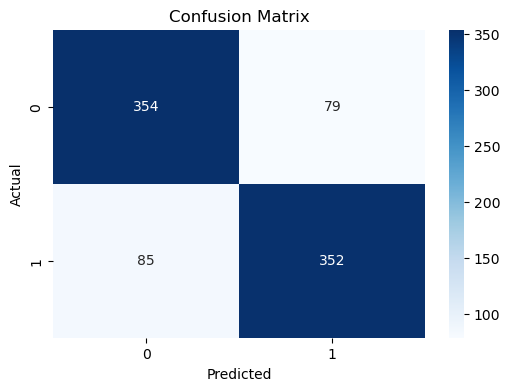

Accuracy: 0.8115
Precision: 0.8167
Recall: 0.8055
F1 Score: 0.8111
---------------------------------------------------------------------- 
               precision    recall  f1-score   support

       False       0.81      0.82      0.81       433
        True       0.82      0.81      0.81       437

    accuracy                           0.81       870
   macro avg       0.81      0.81      0.81       870
weighted avg       0.81      0.81      0.81       870



In [793]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.4f}")

cm_plt(y_test, y_pred)

## 處理測試集

* 缺失值處理

In [794]:
df_test.isna().sum()[df_test.isna().sum()>0]

HomePlanet       87
CryoSleep        93
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Cabin_deck      100
Cabin_num       100
Cabin_side      100
dtype: int64

In [795]:
# 充填缺失值
fn_fillna(df_test)

['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_deck', 'Cabin_num', 'Cabin_side']


C:\Users\JauJyeCH\AppData\Local\Temp\ipykernel_15700\7662276.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d[c] = d[c].fillna(d[c].mode()[0])


In [796]:
# 確認無缺失值
df_test.isna().sum()[df_test.isna().sum()>0]

Series([], dtype: int64)

In [797]:
# 進行ohe編碼：回傳新df
df_test2 = ohe_coding(df_test)
df_test2

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num,Destination_55 Cancri e,...,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_P,Cabin_side_S,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
PassengerId,,,,,,,,,,,,,,,,,,,,,
0013_01,True,27.0,False,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
0018_01,False,19.0,False,0.0,9.0,0.0,2823.0,0.0,4.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
0019_01,True,31.0,False,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
0021_01,False,38.0,False,0.0,6652.0,0.0,181.0,585.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
0023_01,False,20.0,False,10.0,0.0,635.0,0.0,0.0,5.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,True,34.0,False,0.0,0.0,0.0,0.0,0.0,1496.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
9269_01,False,42.0,False,0.0,847.0,17.0,10.0,144.0,442.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9271_01,True,26.0,False,0.0,0.0,0.0,0.0,0.0,296.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [798]:
y_pred_final_test = xgb_model.predict(df_test2)
f = pd.DataFrame(dict(PassengerId=list(df_test2.index), Transported=list(y_pred_final_test.astype(bool)))).set_index('PassengerId')
f.to_csv('sample_submission.csv')

In [799]:
f

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,True
...,...
9266_02,False
9269_01,False
9271_01,True
